# Exploratory Data Analysis

En este notebook se explora el conjunto de datos que será utilizado en la tarea de predicción de precios del mercado diario de la energía en España.

In [20]:
import pandas as pd
import numpy as np

figsize = (14, 6)

title_fontsize = 16
xlabel_fontsize = 13

ylabel_fontsize = 13
xticks_fontsize = 14
yticks_fontsize = 14

xticks_rotation = 0

title_fontweight = 'bold'
xlabel_fontweight = 'bold'
ylabel_fontweight = 'bold'

legend_fontsize = 15

df = pd.read_csv("../datos/dataset.csv")
df.loc[:, 'fecha'] = pd.to_datetime(df['fecha'])

df

,fecha,precio_MD,demanda_prevision_D-1,demanda_Real,precio_Francia,precio_GAS,Temperatura,Radiacion,tipo_dia
0,2020-01-01 00:00:00,41.88,22733.0,18594.922,38.60,11.89,5.65,2.5531,F
1,2020-01-01 01:00:00,38.60,21593.0,17466.294,36.55,11.89,5.65,2.5531,F
2,2020-01-01 02:00:00,36.55,20362.0,16426.445,32.32,11.89,5.65,2.5531,F
3,2020-01-01 03:00:00,32.32,19604.0,15775.322,30.85,11.89,5.65,2.5531,F
4,2020-01-01 04:00:00,30.85,19386.0,15580.377,30.14,11.89,5.65,2.5531,F
...,...,...,...,...,...,...,...,...,...
43795,2024-12-30 19:00:00,172.72,32302.0,28197.217,139.39,48.60,2.84,2.6006,L
43796,2024-12-30 20:00:00,167.21,31700.5,27740.899,130.74,48.60,2.84,2.6006,L
43797,2024-12-30 21:00:00,155.65,29118.8,25678.627,128.95,48.60,2.84,2.6006,L
43798,2024-12-30 22:00:00,146.13,26335.8,23061.434,126.45,48.60,2.84,2.6006,L


## Análisis de correlación entre variables predictoras y objetivo

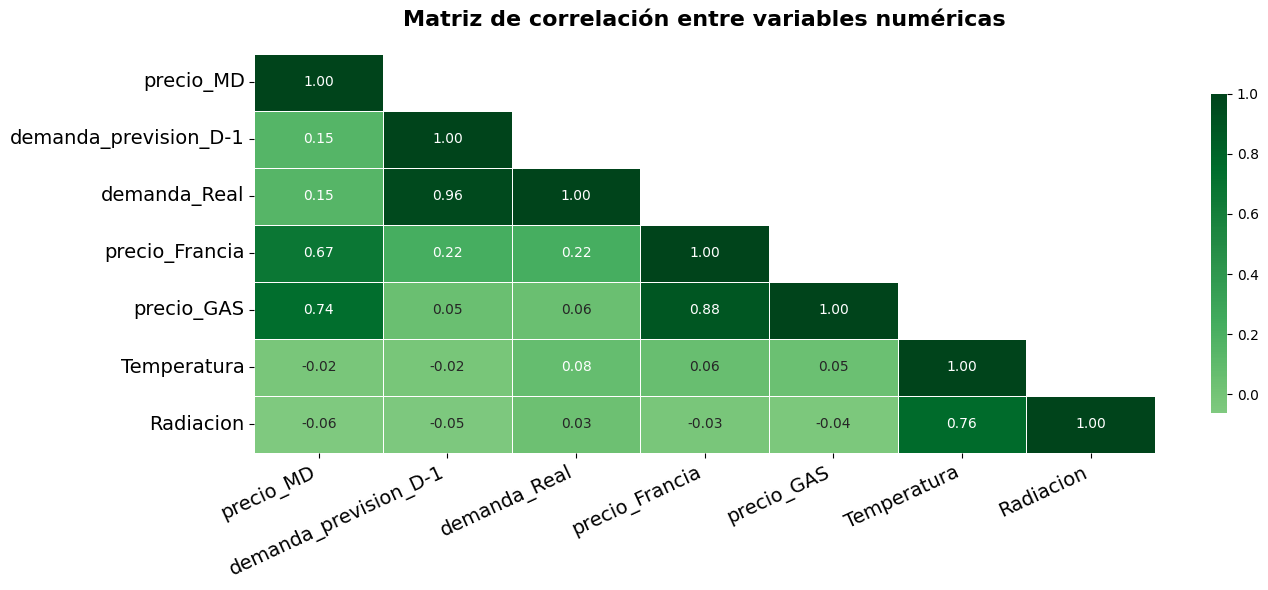

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Seleccionamos solo las variables numéricas
df_numericas = df.select_dtypes(include='number')

# Calculamos la matriz de correlación
corr_matrix = df_numericas.corr()

# Creamos la máscara -> oculta solo triángulo superior (pero deja la diagonal)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Plot
plt.figure(figsize=figsize)
sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True, 
            fmt=".2f", 
            cmap="Greens", 
            center=0, 
            linewidths=0.5, 
            cbar_kws={"shrink": .8})

plt.title("Matriz de correlación entre variables numéricas", 
          fontsize=title_fontsize, fontweight='bold', pad=20)
plt.xticks(rotation=25, ha="right", fontsize=xticks_fontsize)
plt.yticks(fontsize=yticks_fontsize)
plt.tight_layout()
plt.show()


## Análisis de relación entre precio de MIBGAS y mercado eléctrico

In [21]:
df_gas = df[['fecha', 'precio_GAS', 'precio_MD']]
df_gas_semanal = df_gas.set_index('fecha').resample('W-MON').mean().reset_index()
df_gas_semanal

/home/franprados/TFM/.venv/lib/python3.12/site-packages/pandas/core/indexes/base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


,fecha,precio_GAS,precio_MD
0,2020-01-06,12.171667,38.514653
1,2020-01-13,12.440000,43.695000
2,2020-01-20,11.398571,36.771310
3,2020-01-27,12.160000,45.436012
4,2020-02-03,10.304286,36.127679
...,...,...,...
256,2024-12-02,47.785714,115.206012
257,2024-12-09,46.727143,53.982262
258,2024-12-16,43.578571,111.121845
259,2024-12-23,44.067143,88.510536


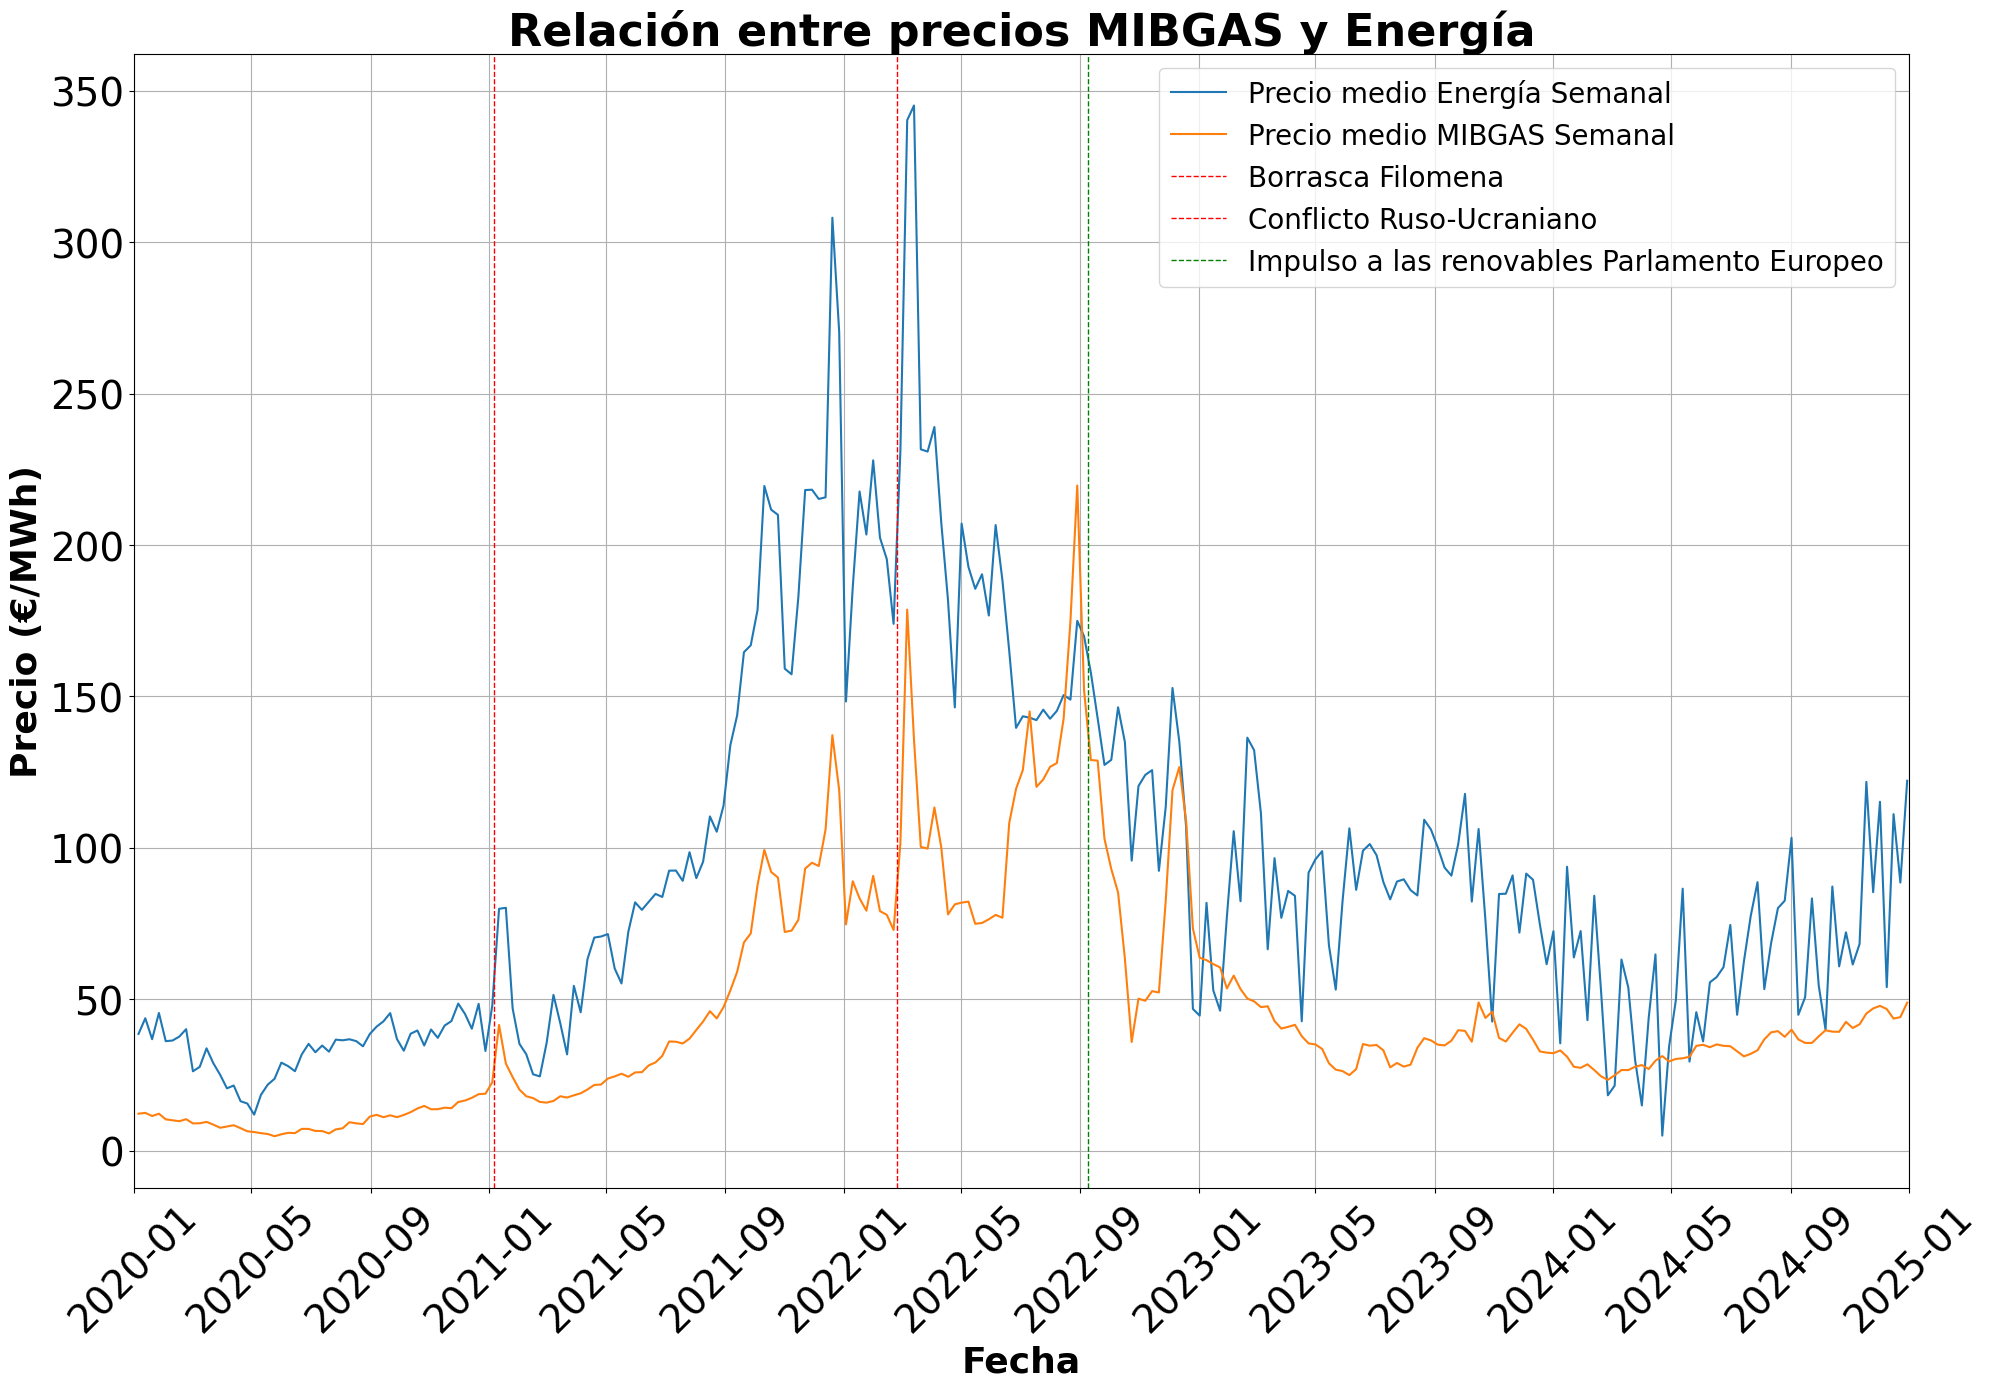

In [36]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

figsize = (20, 14)

title_fontsize = 16*2
xlabel_fontsize = 13*2

ylabel_fontsize = 13*2
xticks_fontsize = 14*2
yticks_fontsize = 14*2

xticks_rotation = 0

title_fontweight = 'bold'
xlabel_fontweight = 'bold'
ylabel_fontweight = 'bold'

legend_fontsize = 20


plt.figure(figsize=figsize)
# plt.plot(df['fecha'], df['precio_MD'], label='Precio Mercado Diario')
plt.plot(df_gas_semanal['fecha'], df_gas_semanal['precio_MD'], label='Precio medio Energía Semanal')
# plt.plot(df_gas_day_ahead['fecha'], df_gas_day_ahead['Precios de los productos MIBGAS (€/MWh)'], label='Precio medio MIBGAS Diario')
plt.plot(df_gas_semanal['fecha'], df_gas_semanal['precio_GAS'], label='Precio medio MIBGAS Semanal')

plt.title('Relación entre precios MIBGAS y Energía', fontsize=title_fontsize, fontweight=title_fontweight)
plt.xlabel('Fecha', fontsize=xlabel_fontsize, fontweight=xlabel_fontweight)
plt.ylabel('Precio (€/MWh)', fontsize=ylabel_fontsize, fontweight=ylabel_fontweight)

plt.axvline(pd.Timestamp('2021-01-06'), color='red', linestyle='--', linewidth=1, label='Borrasca Filomena')
# plt.axvline(pd.Timestamp('2021-10-07'), color='green', linestyle='--', linewidth=1, label='Kremlin propone exportar más gas a Europa')
# plt.axvline(pd.Timestamp('2021-11-01'), color='red', linestyle='--', linewidth=1, label='Cierre del Gasoducto Magreb Europa (GME)')
# plt.axvline(pd.Timestamp('2021-12-22'), color='green', linestyle='--', linewidth=1, label='Desembarco asiático de GNL')
plt.axvline(pd.Timestamp('2022-02-24'), color='red', linestyle='--', linewidth=1, label='Conflicto Ruso-Ucraniano')
plt.axvline(pd.Timestamp('2022-09-09'), color='green', linestyle='--', linewidth=1, label='Impulso a las renovables Parlamento Europeo')
# plt.axvline(pd.Timestamp('2022-12-19'), color='green', linestyle='--', linewidth=1, label='Medidas de solidaridad del Consejo Europeo')

plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 5, 9)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


plt.gca().set_xlim(df['fecha'].min(), pd.Timestamp('2025-01-01'))
plt.xticks(rotation=45, fontsize=xticks_fontsize)
plt.yticks(fontsize=yticks_fontsize)
plt.tight_layout()
plt.legend(fontsize=legend_fontsize, frameon=True)
plt.show()

Correlación semanal entre energía y gas: 0.822


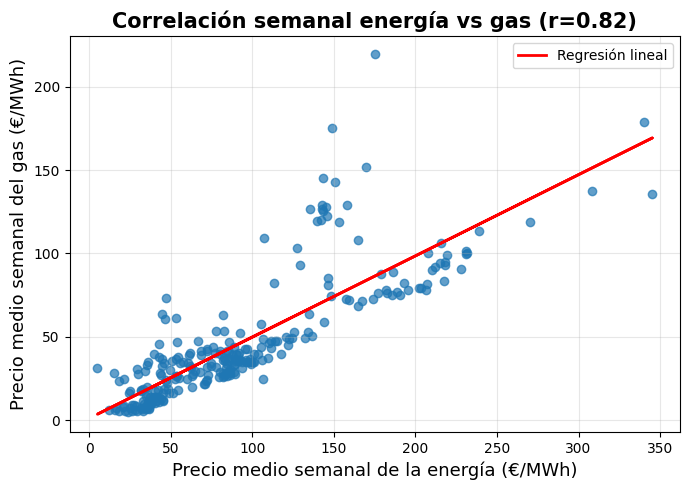

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Calcular la correlación de Pearson
correlacion = df_gas_semanal['precio_MD'].corr(df_gas_semanal['precio_GAS'])
print(f"Correlación semanal entre energía y gas: {correlacion:.3f}")

# Gráfica de dispersión
plt.figure(figsize=(7, 5))
plt.scatter(
    df_gas_semanal['precio_MD'],
    df_gas_semanal['precio_GAS'],
    color='#1f77b4',
    alpha=0.7
)
plt.xlabel('Precio medio semanal de la energía (€/MWh)', fontsize=13)
plt.ylabel('Precio medio semanal del gas (€/MWh)', fontsize=13)
plt.title(f'Correlación semanal energía vs gas (r={correlacion:.2f})', fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Línea de tendencia (regresión lineal)
x = df_gas_semanal['precio_MD']
y = df_gas_semanal['precio_GAS']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red', linewidth=2, label='Regresión lineal')
plt.legend()
plt.show()

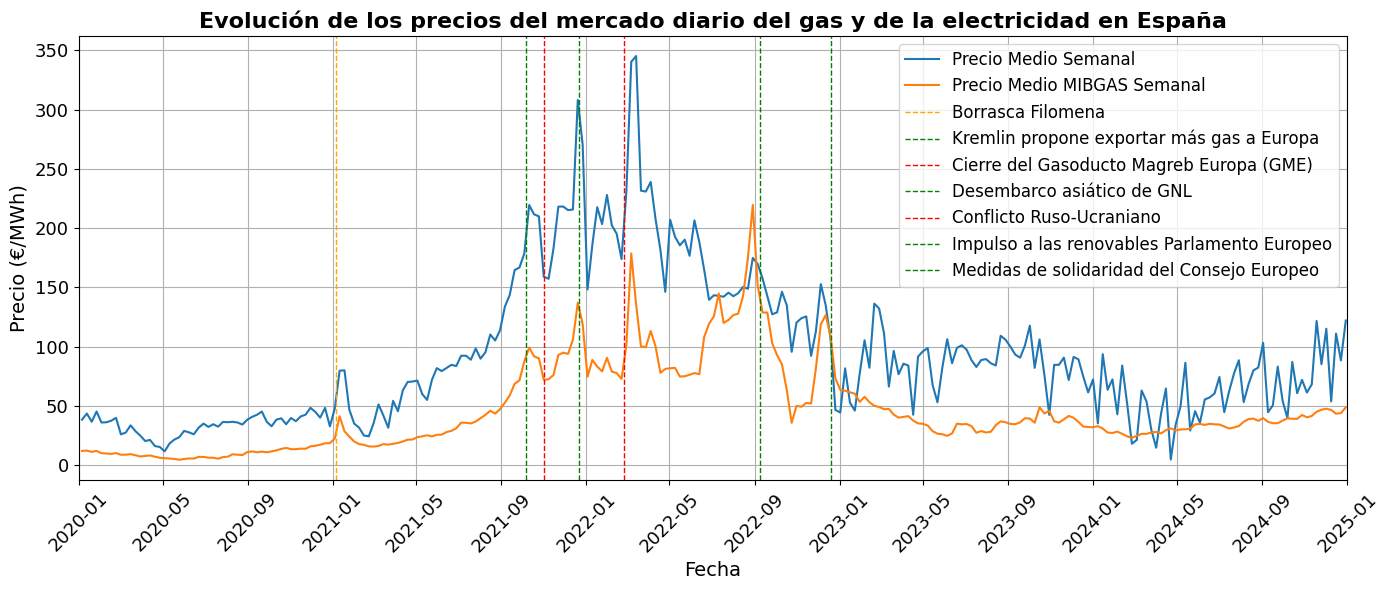

In [38]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd


plt.figure(figsize=(14, 6))
# plt.plot(df['fecha'], df['precio_MD'], label='Precio Mercado Diario')
plt.plot(df_gas_semanal['fecha'], df_gas_semanal['precio_MD'], label='Precio Medio Semanal')
plt.plot(df_gas_semanal['fecha'], df_gas_semanal['precio_GAS'], label='Precio Medio MIBGAS Semanal')

plt.title('Evolución de los precios del mercado diario del gas y de la electricidad en España', fontsize=16, fontweight='bold')
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Precio (€/MWh)', fontsize=14)

plt.axvline(pd.Timestamp('2021-01-06'), color='orange', linestyle='--', linewidth=1, label='Borrasca Filomena')
plt.axvline(pd.Timestamp('2021-10-07'), color='green', linestyle='--', linewidth=1, label='Kremlin propone exportar más gas a Europa')
plt.axvline(pd.Timestamp('2021-11-01'), color='red', linestyle='--', linewidth=1, label='Cierre del Gasoducto Magreb Europa (GME)')
plt.axvline(pd.Timestamp('2021-12-22'), color='green', linestyle='--', linewidth=1, label='Desembarco asiático de GNL')
plt.axvline(pd.Timestamp('2022-02-24'), color='red', linestyle='--', linewidth=1, label='Conflicto Ruso-Ucraniano')
plt.axvline(pd.Timestamp('2022-09-09'), color='green', linestyle='--', linewidth=1, label='Impulso a las renovables Parlamento Europeo')
plt.axvline(pd.Timestamp('2022-12-19'), color='green', linestyle='--', linewidth=1, label='Medidas de solidaridad del Consejo Europeo')

plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 5, 9)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


plt.gca().set_xlim(df['fecha'].min(), pd.Timestamp('2025-01-01'))
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.legend(fontsize=12, frameon=True)
plt.show()